In [39]:
import pandas as pd
import numpy as np
import math
np.random.seed(1)

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Chap 14. 비모수검정
- 추론통계 : 표본데이터를 바탕으로 모집단에 대한 추론 수행
    - 모수통계 : 표본데이터가 정규분포를 따른다는 가정 하에서 모집단 모수와 신뢰구간에 대한 추정
    - 비모수통계 : 표본데이터에 대한 엄격한 가정을 요규하지 않음. 모집단의 분포에 대해 잘 모르거나 표본 데이터가 정규분포를 따른다고 가정하기 어렵거나(편향), 표본 크기가 작거나, 이상점이 문제가 되거나, 전통적 통계적 검정방법이 존재하지 않을 경우 사용
- 비모수 검정 :  표본 데이터가 특정 분포를 가질것 요구하지 않음, 모수통계 가정(정규변환, 이상치제거, 데이터 증가) 충족 가능 시 모수통계 이용 바람직
    1) 순위검정 : 데이터의 순위 이용
    2) 퍼뮤테이션 검정 & 부트스트래핑 : 데이터 표본의 재추출을 통해 생성한 경험적 분포 이용
     
## 14.1 순위검정

### 독립표본 평균검정 : 
- 윌콕슨 순위합 검정 : 두 집단 간 차이 검정(두 집단이 동일한 분포의 모집단으로부터 생성되었는가, 중위수 기반), **모수 통계의 독립표본 T검정에 해당**

1) 순위부여 : 두 집단의 관측값을 통합하고 작은 값에서부터 큰 값 순으로 순위부여

2) 집단별 순위합 평균 계산

3) 두 집단의 순위합 평균이 같은지 검정 : 중위수가 동일하다는 귀무가설이 사실이면, 두 집단 순위합 평균이 비슷할 것 기대

- 크루스칼-월리스 검정 : 세 개 이상의 집단간 차이 검정, **모수통계 일원분산분석**

1) 순위부여 : 두 집단의 관측값을 통합하고 작은 값에서부터 큰 값 순으로 순위부여

2) 집단별 순위합 평균 계산

3) 두 집단의 순위합 평균이 같은지 검정 : 모든 집단 순위합 평균의 차이가 0인지 검정

### 대응표본 평균검정 
- 윌콕슨 부호순위 검정 : 서로다른 집단에 속한 관측값이 짝을 이루고 있는 경우 or 관측값이 반복적으로 측정된 경우의 두 집단 간 차이 검정, **모수통계 대응표본 T검정**

1) 짝을 이룬 값 간 차이 계산

2) 차이에 대한 순위 부여 : 차이가 0이 아닌 모든 케이스에 대해 절대값 기준으로 작은 값에서부터 큰 값의 순서로 순위 부여

3) +/-의 차이를 갖는 케이스에 대해 각각 평균 순위 계산

4) 두 집단의 평균 순위가 같은 지 검정 : 대응표본 각 쌍의 짝을 이룬 값 간 차이의 중위수가 0이라는 귀무가설 검정

- 프리드먼 검정 : 반복측정된 세 개 이상의 집단간 차이 검정, **모수통계의 반복측정 분산분석**

1) 각 케이스 별/집단 별 순위 부여 : 각 케이스를 대상으로 반복측정된 변수(집단)에 대한 순위 부여

2) 집단별 평균 순위 계산

3) 모든 집단간 평균 순위가 같은지 검정 : 모든 집단의 평균 순위의 차이가 0인지 검정

In [3]:
# 독립표본 평균검정
# 수감률이 지역별로 다른가
crime = pd.read_csv('../data/kwak/UScrime.csv').drop('rownames', axis=1)
print(crime.loc[crime['So']==1,'Prob'].median(), crime.loc[crime['So']==0,'Prob'].median())
print(stats.ranksums(crime.loc[crime['So']==1,'Prob'], crime.loc[crime['So']==0,'Prob']))

0.055552000000000004 0.038201
RanksumsResult(statistic=np.float64(3.7492606798089265), pvalue=np.float64(0.00017735665596242502))


In [4]:
# 독립표본 평균검정
# 변수 여러개
airqual = pd.read_csv("../data/kwak/airquality.csv").drop('rownames', axis=1).dropna()
print(airqual[['Month','Ozone']].groupby('Month').median())
print(stats.kruskal(airqual.loc[airqual['Month']==5, 'Ozone'], airqual.loc[airqual['Month']==6, 'Ozone'], airqual.loc[airqual['Month']==7, 'Ozone'], airqual.loc[airqual['Month']==8, 'Ozone'], airqual.loc[airqual['Month']==9, 'Ozone']))

       Ozone
Month       
5       18.0
6       23.0
7       60.0
8       45.0
9       23.0
KruskalResult(statistic=np.float64(26.308626792507006), pvalue=np.float64(2.741846175019204e-05))


In [5]:
# 대응표본 평균검정
# 수확량 Y1, Y2는 연속된 년도 이므로 독립이라 보기 어려움
immer = pd.read_csv("../data/kwak/immer.csv").drop('rownames', axis=1)
print(immer[['Y1', 'Y2']].median())
print(stats.wilcoxon(immer['Y1'], immer['Y2']))

Y1    102.95
Y2     92.95
dtype: float64
WilcoxonResult(statistic=np.float64(96.5), pvalue=np.float64(0.0051520795710785945))


In [6]:
# 대응표본 평균검정
# 3조건에 대한 짝 데이터
data = {
    "cond1" : np.random.normal(loc=5, scale=1, size=10),
    "cond2" : np.random.normal(loc=6, scale=1, size=10),
    "cond3" : np.random.normal(loc=7, scale=1, size=10),
}

print(stats.friedmanchisquare(data['cond1'], data['cond2'], data['cond3']))

FriedmanchisquareResult(statistic=np.float64(11.400000000000006), pvalue=np.float64(0.003345965457471265))


## 14.2 퍼뮤테이션 검정
- 무작위로 배열한 표본 데이터로부터 귀무가설이 사실이라는 가정 하에서 표본통계량 분포를 생성한 후 통계적 검정
- 정확검정 exact test / 근사검정 approximate test

1) 검정통계량 $t=\frac{\bar{X}-\mu}{\frac{s}{\sqrt{n}}}$ 계산

2) 전체 중 일부분을 무작위로 선정하여 A case에, 나머지를 B case에 할당한 후, 이런 방식으로 만들어진 새로운 데이터에 대해 t값 다시 계산

3) 일부분을 A,B에 할당하는 가능한 모든 경우의 수에 대해 새로운 t값 계산하는 과정 반복 수행 $(_nC_k)$
    - 너무 많은 케이스가 있을 경우, 몬테카를로 시뮬레이션도 진행
    
4) t값을 작은 값에서 큰 값 순서대로 배열하여 확률분포(경험적 분포) 생성

5) 원래 데이터의 검정통계량 t값이 확률분포 상 가운데 95% 영역 바깥에 위치하면 A, B의 모집단 평균이 같다는 귀무가설 기각

In [37]:
# 두 집단 permutation 독립표본 평균검정
math_data = pd.DataFrame({'area' : ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'], 'score' : [73, 68, 79, 85, 65, 77, 91, 88, 83, 95]})

def mean_diff(x, y):
    return np.mean(x) - np.mean(y)

def median_diff(x, y):
    return np.median(x) - np.median(y)

def permutation_test_manual(data1, data2, n_permutations=10000):
    observed_diff = np.mean(data1) - np.mean(data2)
    combined = np.concatenate([data1, data2])

    count = 0
    for _ in range(n_permutations):
        np.random.shuffle(combined)
        permuted_diff = np.mean(combined[:len(data1)]) - np.mean(combined[len(data1):])
        if abs(permuted_diff) >= abs(observed_diff):
            count += 1

    p_value = count / n_permutations
    return observed_diff, p_value

print(stats.permutation_test((math_data.loc[math_data['area']=='A', 'score'], math_data.loc[math_data['area']=='B', 'score']), statistic=mean_diff, permutation_type='independent', n_resamples=10000).pvalue)
print(permutation_test_manual(math_data.loc[math_data['area']=='A', 'score'], math_data.loc[math_data['area']=='B', 'score']))
print(stats.ttest_ind(math_data.loc[math_data['area']=='A', 'score'], math_data.loc[math_data['area']=='B', 'score']))

0.03968253968253968
(np.float64(-12.799999999999997), 0.0398)
TtestResult(statistic=np.float64(-2.6666666666666656), pvalue=np.float64(0.02850921057299458), df=np.float64(8.0))


In [67]:
# 두 집단 이상일 경우 : Kruskal(independent), Friedman(paired)
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
iris_data = iris_df[['sepal length (cm)', 'species']]

# 1. 각 그룹별 데이터 추출
groups = [iris_data.loc[iris_data["species"] == species, "sepal length (cm)"].values for species in iris_data["species"].unique()]

print(stats.friedmanchisquare(*groups))
print(stats.kruskal(*groups))

FriedmanchisquareResult(statistic=np.float64(73.78571428571435), pvalue=np.float64(9.498077769131953e-17))
KruskalResult(statistic=np.float64(96.93743600064833), pvalue=np.float64(8.91873433246198e-22))


## 14.3 부트스트래핑
(https://velog.io/@lazy_learner/%EA%B0%80%EC%84%A4%EA%B2%80%EC%A0%95-t-test-%EB%A7%90%EA%B3%A0-%EC%88%9C%EC%97%B4-%EA%B2%80%EC%A0%95-%EC%96%B4%EB%95%8C%EC%9A%94)
- 검정통계량의 분포를 시각화 함으로써 실험 결과의 검정력 설명할 떄 직관적으로 이해를 도울 수 있음
- H0 : 각 집단 실험 결과에 차이가 없는 동일한 그룹
### 절차
1. 가설검정에 사용한 각 집단의 샘플 데이터들을 하나로 합쳐서 잘 섞는다.
2. 통제 집단(control group)과 동일한 크기의 표본을 복원 추출하고 통계량(A)을 계산한다.
3. 실험 집단(test group)과 동일한 크기의 표본을 복원 추출하고 통계량(B)을 계산한다.
4. A와 B의 차이를 기록한다. : 한번 쯤을 나타날 만한 값(검정통계량)
5. 1~4번을 N번 반복하여 검정 통계량 분포를 생성하고, 두 집단의 기존 관측값의 차이가 해당 분포 내 어느 위치에 있는지 확인한다.
###
- 부트스트랩 : 무작위 복원 추출의 n번 반복, 현재 데이터에서 발생가능한 변동성을 알아보기 위해 반복적으로 표본 추출
=> 모집단 통계량 추정을 위해 현재 보유한 데이터로 표본 통계량을 무수히 많이 추정, 확률의 독립성 및 가정 만족


1.934237262541905


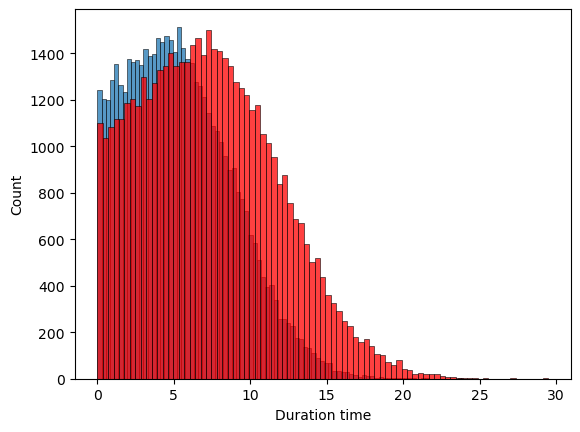

In [107]:
# A, B 상품그룹 검색의 평균 체류시간 차이 검정
## 데이터 확인
np.random.seed(2022)
n = 50000

a = abs(np.random.normal(loc=5, scale=4, size=n))
b = abs(np.random.normal(loc=7, scale=5, size=n))

df_a = pd.DataFrame({"Group": ["A"] * n, "Duration time": a})
df_b = pd.DataFrame({"Group": ["B"] * n, "Duration time": b})
df = pd.concat([df_a, df_b], ignore_index=True)

fig, ax = plt.subplots()
sns.histplot(df_a['Duration time'], ax=ax);
sns.histplot(df_b['Duration time'], color='red', ax=ax);

print(np.mean(df_b['Duration time']) - np.mean(df_a['Duration time']))

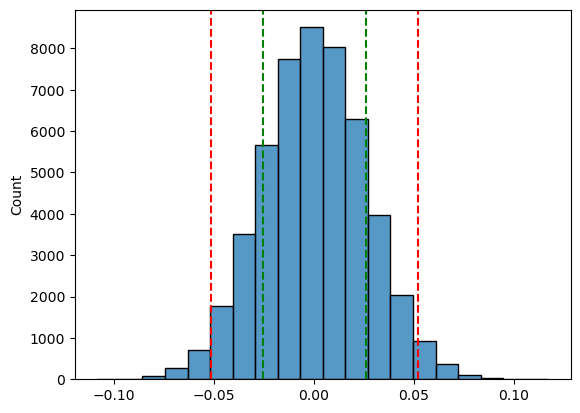

In [108]:
## 순열 검정 통계량 분포 생성
# 데이터 셔플링
df_samples = df.sample(frac=1, ignore_index=True, random_state=1)
n_a, n_b = df_samples['Group'].value_counts()

sample_mean_list = []

# 순열 검정 통계량 생성
n_extract = 5000
for _ in range(n):
    sample_a = df_samples.sample(n=n_a, replace=True)['Duration time']
    sample_b = df_samples.sample(n=n_b, replace=True)['Duration time']
    
    sample_mean_a = np.mean(sample_a)
    sample_mean_b = np.mean(sample_b)
    
    sample_mean_list.append(sample_mean_b - sample_mean_a)
    
    if n == (n_extract/2):
        print("half way done")
    
# 분포 확인
sns.histplot(sample_mean_list, bins=20);
sigma_1_left = np.mean(sample_mean_list) - np.std(sample_mean_list)
sigma_1_right = np.mean(sample_mean_list) + np.std(sample_mean_list)

sigma_2_left = np.mean(sample_mean_list) - (np.std(sample_mean_list) * 2)
sigma_2_right = np.mean(sample_mean_list) + (np.std(sample_mean_list) * 2)

plt.axvline(x=sigma_1_left, ymin=0, ymax=1, color="g", ls="--");
plt.axvline(x=sigma_1_right, ymin=0, ymax=1, color="g", ls="--");

plt.axvline(x=sigma_2_left, ymin=0, ymax=1, color="r", ls="--");
plt.axvline(x=sigma_2_right, ymin=0, ymax=1, color="r", ls="--");

In [109]:
print(sigma_2_right, sigma_1_right)

0.051810600769287715 0.026004018267985252
